In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D
import keras.backend as k
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train[0:1000]
y_train = y_train[0:1000]

In [10]:
y_train.shape

(1000,)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_test = x_test[0:300]
y_test = y_test[0:300]

In [13]:
x_test.shape

(300, 28, 28)

In [14]:
y_train[0]

5

In [15]:
y_test

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8], d

In [16]:
from keras.layers import Flatten

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [18]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [19]:
x_train = x_train / 255

In [20]:
x_test = x_test / 255

In [21]:
y_train[0].shape

()

In [22]:
x_train.shape

(1000, 28, 28, 1)

In [23]:
model = Sequential()
model.add(Conv2D(128, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [24]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, batch_size = 20, epochs = 100, shuffle=True, validation_split=0.2, verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 2s - loss: 2.2385 - accuracy: 0.3075 - val_loss: 2.1549 - val_accuracy: 0.5000
Epoch 2/100
 - 2s - loss: 2.0313 - accuracy: 0.5412 - val_loss: 1.8932 - val_accuracy: 0.6950
Epoch 3/100
 - 2s - loss: 1.6342 - accuracy: 0.7100 - val_loss: 1.4094 - val_accuracy: 0.7400
Epoch 4/100
 - 2s - loss: 1.1440 - accuracy: 0.7575 - val_loss: 0.9385 - val_accuracy: 0.8000
Epoch 5/100
 - 2s - loss: 0.7682 - accuracy: 0.8375 - val_loss: 0.7097 - val_accuracy: 0.8350
Epoch 6/100
 - 2s - loss: 0.5980 - accuracy: 0.8338 - val_loss: 0.5919 - val_accuracy: 0.8400
Epoch 7/100
 - 2s - loss: 0.5023 - accuracy: 0.8662 - val_loss: 0.5344 - val_accuracy: 0.8550
Epoch 8/100
 - 2s - loss: 0.4263 - accuracy: 0.8687 - val_loss: 0.5154 - val_accuracy: 0.8600
Epoch 9/100
 - 2s - loss: 0.3742 - accuracy: 0.9062 - val_loss: 0.4725 - val_accuracy: 0.8700
Epoch 10/100
 - 2s - loss: 0.3477 - accuracy: 0.9075 - val_loss: 0.4783 - val_accuracy: 0.8700
Epoch 11/100


Epoch 87/100
 - 2s - loss: 0.0114 - accuracy: 0.9975 - val_loss: 0.4590 - val_accuracy: 0.9200
Epoch 88/100
 - 2s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.9150
Epoch 89/100
 - 2s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4315 - val_accuracy: 0.9200
Epoch 90/100
 - 2s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4393 - val_accuracy: 0.9200
Epoch 91/100
 - 2s - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.4533 - val_accuracy: 0.9200
Epoch 92/100
 - 2s - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.4687 - val_accuracy: 0.9150
Epoch 93/100
 - 2s - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.4737 - val_accuracy: 0.9150
Epoch 94/100
 - 2s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.9200
Epoch 95/100
 - 2s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.9150
Epoch 96/100
 - 2s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.4659 - val_accuracy: 0.9300
Epoch 97/100
 - 2s - loss: 0.0067 - accuracy: 0.99

In [27]:
pred_cls = model.predict_classes(x_test, verbose=0)

In [28]:
pred_cls

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       5, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 5, 3, 8, 9, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 3, 2, 3, 0, 4, 4, 2, 9, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8], d

In [29]:
accuracy_score(pred_cls, y_test)

0.9633333333333334

In [30]:
cm = confusion_matrix(pred_cls, y_test)
cm

array([[24,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  2,  0, 29,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 33]], dtype=int64)

Text(0.5, 1, 'confusion matrix')

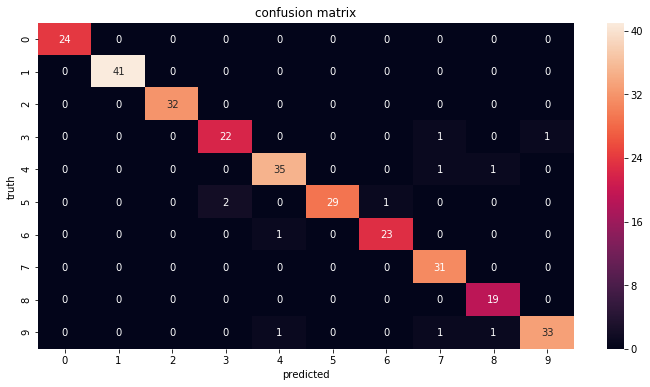

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title('confusion matrix')

In [32]:
import joblib 
joblib.dump(model, 'E://models//mnist_prediction_cnn')

['E://models//mnist_prediction_cnn']